#**Task 1 familiarizing with Pennylane tutorials**

###In this first section we see how to normalize a state vector. We notice that it is state vector with magnitude = 1

In [1]:
# Here are the vector representations of |0> and |1>, for convenience
import numpy as np
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """
    # Calculate the normalization factor
    norm_factor = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)

    # Normalize the amplitudes
    alpha_prime = alpha / norm_factor
    beta_prime = beta / norm_factor

    # Return the normalized state vector
    return np.array([alpha_prime, beta_prime])

# Example usage:
alpha = 1 + 1j
beta = 1 - 1j
normalize_state(alpha, beta)


array([0.5+0.5j, 0.5-0.5j])

### Inner product and orthonormal bases

In [2]:
def inner_product(state_1, state_2):
    inner_prod = np.dot(np.conjugate(state_1), state_2)
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """


    # COMPUTE AND RETURN THE INNER PRODUCT

    inner_prod = np.dot(np.conjugate(state_1), state_2)

    return inner_prod


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


### Sampling measurement outcomes

In [3]:
def measure_state(state, num_meas):

    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES
    prob_0 = np.abs(state[0]) ** 2  # Probability of measuring |0>
    prob_1 = np.abs(state[1]) ** 2  # Probability of measuring |1>

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES
    outcomes = np.random.choice([0, 1], size=num_meas, p=[prob_0, prob_1])
    return outcomes

# Example
state = np.array([0.8, 0.6])
num_meas = 10
measure_state(state, num_meas)

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

### Applying a Quantum operation

In [4]:

def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """

    new_state = np.dot(U, state)

    return new_state

# Example
U = np.array([[0, 1], [1, 0]])
state = np.array([0.8, 0.6])
apply_u(state)

array([0.6, 0.8])

### A simple quantum algorithm

In [5]:

def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """

    # PREPARE THE STATE |0>
    return np.array([1,0])
    pass


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """


    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    return measure_state(apply_u(initialize_state()),100)



# Example
state = np.array([0.8, 0.6])
num_meas = 10
quantum_algorithm()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Order of operations
circuit_i-2-1.svg

In [6]:
! pip install pennylane

In [7]:
import pennylane as qml
def my_circuit(theta, phi):

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    return qml.probs(wires=[0, 1, 2])
print(qml.probs(wires=[0, 1, 2]))

probs(wires=[0, 1, 2])


### Building a QNode
circuit_i-2-2.svg

In [8]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):


    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2,0])
    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

### The QNode decorator

In [9]:
dev = qml.device("default.qubit", wires=3)



# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE
@qml.qnode(dev)

def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3


# RUN THE QNODE WITH THE PROVIDED PARAMETERS
my_circuit(theta, phi, omega)

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

#### Circuit depth
circuit_i-2-3.svg

In [10]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4

theta, phi, omega = 0.1, 0.2, 0.3
my_circuit(theta, phi, omega)

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

### Unitaries in PennyLane
The quantum function below creates a circuit that applies U to the qubit and returns its state.

In [11]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def apply_u():

    qml.QubitUnitary(U, wires=0)

    # Return the state
    return qml.state()
apply_u()


tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

### Parametrized unitaries (Arbitrary single qubit rotation)
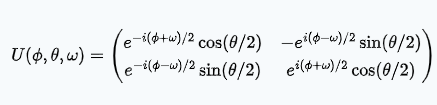

In [12]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    qml.Rot(phi, theta, omega, wires = 0)

    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()
apply_u_as_rot(phi, theta, omega)

tensor([0.96770153-0.24709477j, 0.04991671+0.00249792j], requires_grad=True)

### Flipping bits with the **X operator**
Also called The PauliX operation, is used in PennyLane for flipping.

In [13]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER
    if state.any() == 1:
        qml.PauliX(wires=0)  # Apply Pauli-X gate to change |0⟩ to |1⟩
    # APPLY U TO THE STATE
    qml.QubitUnitary(U, wires=0)
    return qml.state()

state = np.array([1, 1])
varied_initial_state(state)

tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True)

### Uniform superposition
This the Hadamard gate, and is typically denoted by H and implemented as qml.Hadamard.It can create a uniform superposition of the two states.

In [14]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard():

    # APPLY THE HADAMARD GATE
    qml.Hadamard(wires=0)
    # RETURN THE STATE
    return qml.state()
print(apply_hadamard())

[0.70710678+0.j 0.70710678+0.j]


#### Combining X and H

In [15]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state
    if state == 1:
        qml.PauliX(wires=0)  # Apply Pauli-X gate to change |0⟩ to |1⟩
    # APPLY THE HADAMARD
    qml.Hadamard(wires=0)
    # RETURN THE STATE

    return qml.state()


print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))

[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


### A QNode with X and H
hxh.svg

In [16]:

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)
# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE
@qml.qnode(dev)
def apply_hxh(state):
    if state == 1:
        qml.PauliX(wires=0)  # Change |0⟩ to |1⟩
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)


    return qml.state()
# Print your results
print(apply_hxh(0))
print(apply_hxh(1))

[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


#### The Pauli Z-gate. Is defined by its action on the computational basis states
z.svg
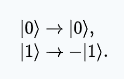

In [17]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    # CREATE THE |+> STATE
    qml.Hadamard(wires=0)
    # APPLY PAULI Z
    qml.PauliZ(wires=0)
    # RETURN THE STATE
    return qml.state()


print(apply_z_to_plus())

[ 0.70710678+0.j -0.70710678+0.j]


### Z Rotation

Z Rotation is a quantum gate that modifies the relative phase between two states


In [18]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    # CREATE THE |+> STATE
    qml.Hadamard(wires=0)
    # APPLY RZ
    qml.RZ(np.pi, wires=0)
    # RETURN THE STATE
    return qml.state()
fake_z()

tensor([4.32978028e-17-0.70710678j, 4.32978028e-17+0.70710678j], requires_grad=True)

### The S and T gates

 ## circuit_153.svg

In [19]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.adjoint(qml.T)(wires=0)
    qml.RZ(0.3, wires=0)
    qml.adjoint(qml.S)(wires=0)


    # RETURN THE STATE

    return qml.state()

### Applying RX

In [20]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi, wires=0)
    return qml.state()

print(apply_rx_pi(0))
print(apply_rx_pi(1))

[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


After the rotation, the qubit can end up in a superposition of states. This means it can be in a combination of both.

#### Plotting RX

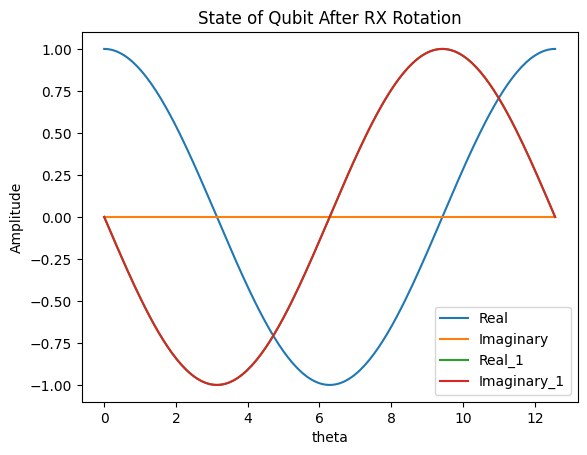

In [26]:
import matplotlib.pyplot as plt
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)


    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta, wires=0)
    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

real_parts = [state[0].real for state in output_states]
imag_parts = [state[0].imag for state in output_states]
real_parts_1 = [state[1].real for state in output_states]
imag_parts_1 = [state[1].imag for state in output_states]

# Plot the real and imaginary parts against the angles
plt.plot(angles, real_parts, label='Real')
plt.plot(angles, imag_parts, label='Imaginary')
plt.plot(angles, imag_parts_1, label='Real_1')
plt.plot(angles, imag_parts_1, label='Imaginary_1')
plt.xlabel('theta')
plt.ylabel('Amplitude')
plt.title('State of Qubit After RX Rotation')
plt.legend()

### Plotting RY

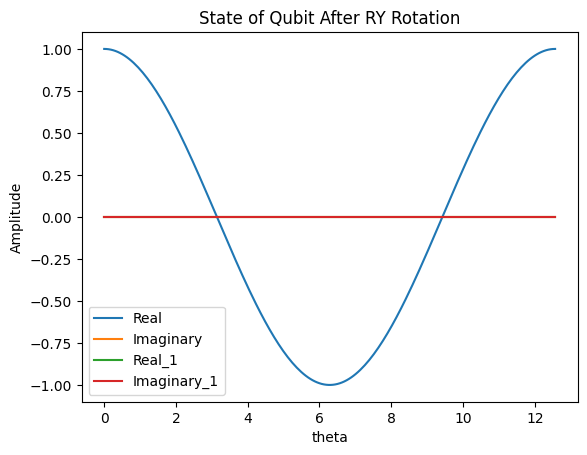

In [31]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta, wires=0)
    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

real_parts = [state[0].real for state in output_states]
imag_parts = [state[0].imag for state in output_states]
real_parts_1 = [state[1].real for state in output_states]
imag_parts_1 = [state[1].imag for state in output_states]

# Plot the real and imaginary parts against the angles
plt.plot(angles, real_parts, label='Real')
plt.plot(angles, imag_parts, label='Imaginary')
plt.plot(angles, imag_parts_1, label='Real_1')
plt.plot(angles, imag_parts_1, label='Imaginary_1')
plt.xlabel('theta')
plt.ylabel('Amplitude')
plt.title('State of Qubit After RY Rotation')
plt.legend()


#### State preparation with Mottonen's method
PennyLane contains a template called MottonenStatePreparation, which will automatically prepare any normalized qubit state vector, up to a global phase.

In [32]:
v = np.array([0.52889389 - 0.14956775j, 0.67262317 + 0.49545818j])

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)

# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE

@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(state, wires=0)

    return qml.state()

# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy="device")(v))


[0.52889389-0.14956775j 0.67262317+0.49545818j]

0: ──RY(1.98)──RZ(0.91)──GlobalPhase(-0.18)─┤  State


#### Measuring a superposition
Outcome probabilities of the basis states can be returned directly in PennyLane.


In [33]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        np.array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY HADAMARD AND MEASURE
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)


print(apply_h_and_measure(0))
print(apply_h_and_measure(1))

[0.5 0.5]
[0.5 0.5]


#### Measurement of the PauliY observation

exercise_i101.svg

In [34]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def circuit():

    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y

    return qml.expval(qml.PauliY(wires=0))


print(circuit())

-0.7071067811865471


### Separable Operations
In PennyLane, we can return measurements of multiple observables as a tuple, as long as they don't share wires.

In [35]:
# Creates a device with *two* qubits
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def two_qubit_circuit():
    # PREPARE |+>|1>
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT

    return qml.expval(qml.Y(wires=0)), qml.expval(qml.Z(wires=1))


print(two_qubit_circuit())

(tensor(0., requires_grad=True), tensor(-1., requires_grad=True))


### Entangling Operations

In [36]:


num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])


    # APPLY THE CNOT
    qml.CNOT(wires=[0, 1])  # Apply CNOT with qubit 0 as control and qubit 1 as target

    return qml.state()

# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {
    "00": "00",  # CNOT(00) = 00
    "01": "01",  # CNOT(01) = 01
    "10": "11",  # CNOT(10) = 11 (flips target qubit)
    "11": "10"   # CNOT(11) = 10 (flips target qubit)
}

# Run your QNode with various inputs to help fill in your truth table
for i in range(4):  # Test all basis states from 0 to 3
    basis_state = np.binary_repr(i, width=num_wires)
    result_state = apply_cnot(i)
    print(f"CNOT({basis_state}) = {result_state}")

# Print the truth table
print("CNOT Truth Table:")
for key, value in cnot_truth_table.items():
    print(f"{key} -> {value}")

CNOT(00) = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
CNOT(01) = [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
CNOT(10) = [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
CNOT(11) = [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
CNOT Truth Table:
00 -> 00
01 -> 01
10 -> 11
11 -> 10


We implement the following circuit and inspect the output state.
 bell_normal.svg

In [37]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def apply_h_cnot():


    # APPLY THE OPERATIONS IN THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()


print(apply_h_cnot())


# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


Let us write a circuit in PennyLane that implements the following sequence of operations, then return the measurement outcome probabilities.

circuit_4.svg

In [38]:


# Create a device with 3 qubits
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        np.array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """
    # Initialize the qubits in the |0> state (this is the default state)

    # Apply controlled rotations
    qml.Hadamard(wires=0)
    qml.CRX(theta, wires=[0, 1])
    qml.CRY(phi, wires=[1, 2])
    qml.CRZ(omega, wires=[2, 0])
    #qml.CRY(phi, wires=[0, 1])
    #qml.CRY(omega, wires=[1, 2])

    # Measure the qubits in the computational basis
    return qml.probs(wires=[0, 1, 2])  # Get the probabilities of all basis states

# Example angles
theta, phi, omega = 0.1, 0.2, 0.3
controlled_rotations(theta, phi, omega)

tensor([5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.98751041e-01, 0.00000000e+00, 1.23651067e-03, 1.24480103e-05], requires_grad=True)

#### The SWAP gate
The  SWAP can be implemented using only CNOT  gates. In the code below, we try to find the sequence of CNOT gates to match the output state to that produced by a SWAP

In [39]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4

def prepare_states(phi, theta, omega):
    """Prepare the two-qubit state using rotations."""
    qml.RY(phi, wires=0)  # Rotate qubit 0
    qml.RY(theta, wires=1)  # Rotate qubit 1
    qml.CNOT(wires=[0, 1])  # Apply CNOT gate

@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    # Implement the regular SWAP gate
    qml.SWAP(wires=[0, 1])  # Apply the SWAP gate

    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)

    # Implement the SWAP gate using a sequence of CNOTs
    qml.CNOT(wires=[0, 1])  # First CNOT from qubit 0 to qubit 1
    qml.CNOT(wires=[1, 0])  # Second CNOT from qubit 1 to qubit 0
    qml.CNOT(wires=[0, 1])  # Third CNOT from qubit 0 to qubit 1

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")

Regular SWAP state = [0.33713923+0.j 0.51538529+0.j 0.75333659+0.j 0.23064936+0.j]
CNOT SWAP state = [0.33713923+0.j 0.51538529+0.j 0.75333659+0.j 0.23064936+0.j]


We were not able to implement this and come out with the expected result.

### Quantum Multiplexer


In [40]:
dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]

@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)  # Apply X gate to qubit 0 if state[0] is 1
    if state[1] == 1:
        qml.PauliX(wires=1)  # Apply X gate to qubit 1 if state[1] is 1

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)  # Prepare qubit 2 in state |1>
    qml.Hadamard(wires=2)  # Apply Hadamard to create state |->


    # Implement the multiplexer
    # If state of first two qubits is 01, apply X to third qubit
    if state == [0, 1]:
        qml.PauliX(wires=2)  # Apply X gate to qubit 2

    # If state of first two qubits is 10, apply Z to third qubit
    elif state == [1, 0]:
        qml.PauliZ(wires=2)  # Apply Z gate to qubit 2

    # If state of first two qubits is 11, apply Y to third qubit
    elif state == [1, 1]:
        qml.PauliY(wires=2)  # Apply Y gate to qubit 2

    return qml.state()


# Print the output state after applying the control sequence
print(apply_control_sequence(state))


[ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
